In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

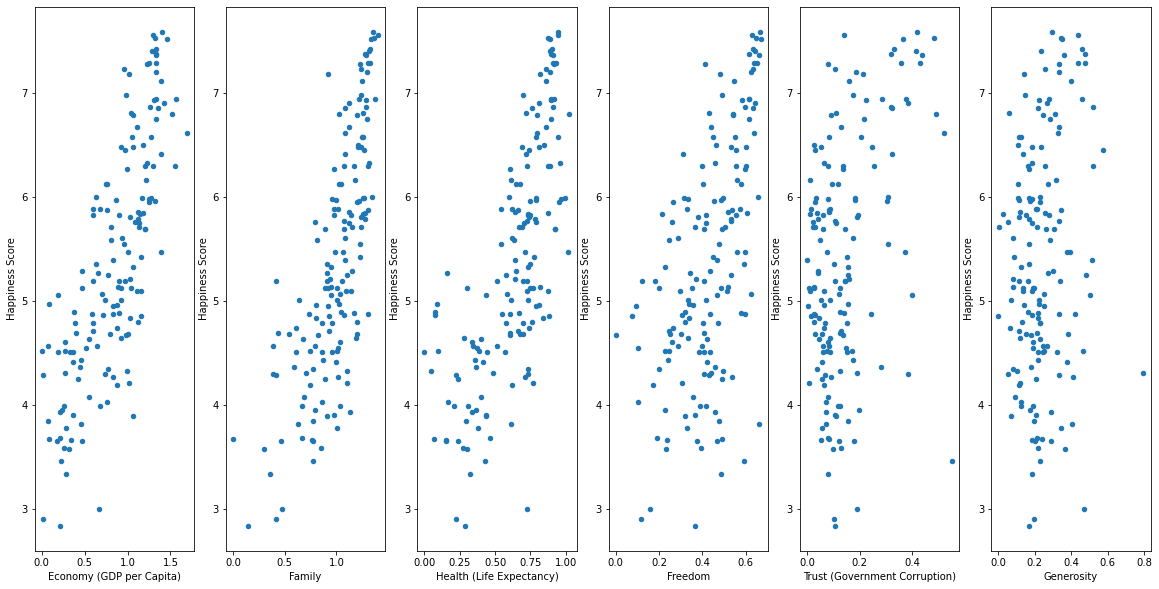

In [6]:
fig, axs = plt.subplots(1,6)
data.plot(kind = 'scatter', x = 'Economy (GDP per Capita)', y = 'Happiness Score', ax = axs[0], figsize = (20,10))
data.plot(kind = 'scatter', x = 'Family', y = 'Happiness Score', ax = axs[1])
data.plot(kind = 'scatter', x = 'Health (Life Expectancy)', y = 'Happiness Score', ax = axs[2])
data.plot(kind = 'scatter', x = 'Freedom', y = 'Happiness Score', ax = axs[3])
data.plot(kind = 'scatter', x = 'Trust (Government Corruption)', y = 'Happiness Score', ax = axs[4])
data.plot(kind = 'scatter', x = 'Generosity', y = 'Happiness Score', ax = axs[5])

fig.savefig('testdata.jpg')

In [8]:
X = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']]
Y = data['Happiness Score']

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [9]:
print (lm.intercept_)
print(lm.coef_)

1.8963411367389136
[0.88258756 1.35810555 0.99594485 1.77071357]


In [10]:
lm.predict(X)

array([7.0778067 , 7.00749685, 6.93496373, 7.05912731, 6.88591828,
       6.84718968, 6.78784831, 6.89787804, 6.82883087, 6.93235668,
       6.28469312, 6.40006128, 6.83039974, 5.70334298, 6.64600108,
       5.99944972, 6.93868702, 6.92093423, 6.72468473, 6.62692428,
       6.72137116, 6.44605125, 6.00107658, 6.60652349, 6.21597244,
       6.80985337, 6.03718658, 6.78119913, 6.65186487, 6.10178243,
       6.23773123, 6.35230981, 6.02608878, 6.18892817, 5.86710442,
       6.53169182, 6.682775  , 6.07272858, 6.55625463, 5.75698269,
       6.17514181, 5.35237397, 5.6355248 , 6.03576777, 6.0008267 ,
       6.59081254, 5.84501425, 5.66335243, 6.26612071, 6.04243376,
       5.38010952, 4.99674483, 5.95168721, 5.96705786, 6.6196086 ,
       5.72284213, 5.69310526, 5.47641808, 5.88636404, 6.34391583,
       6.00252136, 5.17632357, 5.85291578, 5.89528347, 5.75258488,
       6.20378402, 5.81565381, 5.31021185, 4.77346576, 5.78794732,
       5.8230555 , 6.62142087, 6.14579472, 5.56442172, 5.48953

In [11]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Y ~ X', data = data).fit()
lm.pvalues

Intercept    1.315877e-18
X[0]         5.053161e-05
X[1]         8.370038e-09
X[2]         1.779550e-03
X[3]         3.655042e-07
dtype: float64

In [12]:
lm.rsquared

0.7699839204155501

In [13]:
x = data [['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']]
y = data['Happiness Score']

lm = LinearRegression()
lm.fit(x,y)

print ('intercept : -->',lm.intercept_)
print ('Economy (GDP per Capita) :        -->',lm.coef_[0])
print ('Family :     -->',lm.coef_[1])
print ('Health (Life Expectancy) : -->',lm.coef_[2])
print ('Freedom : -->',lm.coef_[3])

intercept : --> 1.8963411367389136
Economy (GDP per Capita) :        --> 0.8825875636298159
Family :     --> 1.3581055477027755
Health (Life Expectancy) : --> 0.9959448475728669
Freedom : --> 1.7707135731263834


In [14]:
lm = smf.ols(formula = 'Happiness Score ~ Economy (GDP per Capita) + Family + Health(Life Expectancy) + Freedom', data = data).fit()
lm.summary()

SyntaxError: invalid syntax (<unknown>, line 1)